In [ ]:
!nvidia-smi

Fri Aug 26 07:33:55 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#download dataset

kaggle.json 파일 업로드하기

In [ ]:
!cp /content/drive/MyDrive/KDT/offline/kaggle.json .

In [ ]:
!pip install -q kaggle

In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle competitions download -c ml-olympiad-gdscuiz-and-tfugagadir

100% 672M/675M [00:07<00:00, 51.1MB/s]
100% 675M/675M [00:07<00:00, 94.1MB/s]


In [ ]:
!unzip -qq ml-olympiad-gdscuiz-and-tfugagadir.zip

In [ ]:
!rm ml-olympiad-gdscuiz-and-tfugagadir.zip

#importing library

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

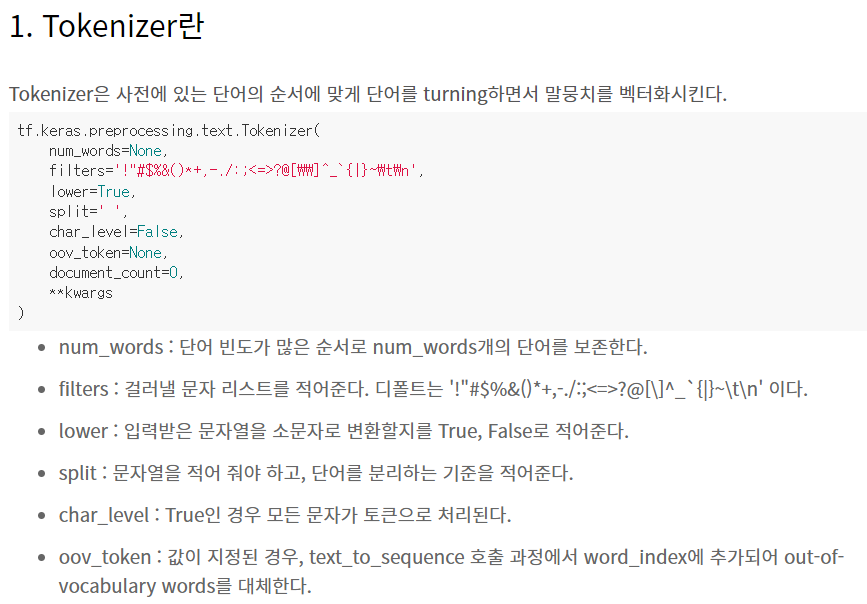

about tensorflow-addons

https://github.com/tensorflow/addons

#EDA

In [ ]:
train_ds = pd.read_csv('./train.csv')
train_ds.head()

,Unnamed: 0,id,genome_sequence,species
0,0,11408003,ccacatcccctccagcacctgttgtttcctgactttttaatgattg...,Gorilla_gorilla
1,1,18639873,tgtttacttgccaatctttgtttagctgtcagagtggcttgctaaa...,Gorilla_gorilla
2,2,9869298,tctgtgaagaaagacattggtagcttgatggggatgacattgaatc...,Homo_sapiens
3,3,10762804,ttgtgagaattacgtgagatgatagatttagggactatagaatagt...,Gorilla_gorilla
4,4,13724428,gcaaaaaataagttgataagttgattgatatgttattagcttaatt...,Gorilla_gorilla


In [ ]:
train_ds = train_ds[['genome_sequence','species']]
train_ds

,genome_sequence,species
0,ccacatcccctccagcacctgttgtttcctgactttttaatgattg...,Gorilla_gorilla
1,tgtttacttgccaatctttgtttagctgtcagagtggcttgctaaa...,Gorilla_gorilla
2,tctgtgaagaaagacattggtagcttgatggggatgacattgaatc...,Homo_sapiens
3,ttgtgagaattacgtgagatgatagatttagggactatagaatagt...,Gorilla_gorilla
4,gcaaaaaataagttgataagttgattgatatgttattagcttaatt...,Gorilla_gorilla
...,...,...
19799995,agaggtgaagcacttaaattgtgccaggcacataatatatattaaa...,Homo_sapiens
19799996,tctaaagttctggaatttcaggcatagagccaccacatccagccga...,Homo_sapiens
19799997,tttttgttaaagtgaagaaataactttctttttttgttttttttga...,Gorilla_gorilla
19799998,gagccatgtgttatgaagagcagggcctccattggctgtgtccctg...,Gorilla_gorilla


총 19,800,000개의 데이터

In [ ]:
len(train_ds[train_ds['species']=='Gorilla_gorilla'])

9899415

In [ ]:
len(train_ds[train_ds['species']=='Homo_sapiens'])

9900585

Gorilla_gorilla = 9,899,415

Homo_Sapiens = 9,900,585

약 1:1의 비율로 구성.

In [ ]:
train_ds['length'] = train_ds['genome_sequence'].apply(len)
train_ds

,genome_sequence,species,length
0,ccacatcccctccagcacctgttgtttcctgactttttaatgattg...,Gorilla_gorilla,80
1,tgtttacttgccaatctttgtttagctgtcagagtggcttgctaaa...,Gorilla_gorilla,80
2,tctgtgaagaaagacattggtagcttgatggggatgacattgaatc...,Homo_sapiens,80
3,ttgtgagaattacgtgagatgatagatttagggactatagaatagt...,Gorilla_gorilla,80
4,gcaaaaaataagttgataagttgattgatatgttattagcttaatt...,Gorilla_gorilla,80
...,...,...,...
19799995,agaggtgaagcacttaaattgtgccaggcacataatatatattaaa...,Homo_sapiens,80
19799996,tctaaagttctggaatttcaggcatagagccaccacatccagccga...,Homo_sapiens,80
19799997,tttttgttaaagtgaagaaataactttctttttttgttttttttga...,Gorilla_gorilla,80
19799998,gagccatgtgttatgaagagcagggcctccattggctgtgtccctg...,Gorilla_gorilla,80


In [ ]:
train_ds['length'].unique()

array([80, 39, 37,  2, 30, 25, 16,  3, 15, 57, 48, 32, 31, 43, 60, 50])

✨ 꼭 기억하자 value_counts()

https://www.codeit.kr/community/threads/5941

In [ ]:
train_ds['length'].value_counts()

80    19799984
37           2
39           1
2            1
30           1
25           1
16           1
3            1
15           1
57           1
48           1
32           1
31           1
43           1
60           1
50           1
Name: length, dtype: int64

In [ ]:
train_ds[train_ds['species']=='Gorilla_gorilla']['length'].value_counts()

80    9899411
30          1
3           1
57          1
48          1
Name: length, dtype: int64

In [ ]:
train_ds[train_ds['species']=='Homo_sapiens']['length'].value_counts()

80    9900573
37          2
39          1
2           1
25          1
16          1
15          1
32          1
31          1
43          1
60          1
50          1
Name: length, dtype: int64

In [ ]:
train_ds[train_ds['length']==3]

,genome_sequence,species,length
5862575,tat,Gorilla_gorilla,3


model의 정확도를 위해 이런 outlier들은 제거하고 training을 할 계획

In [ ]:
train_final = train_ds[train_ds.length == 80]
len(train_final)

19799984

In [ ]:
train_final = train_final.reset_index(drop = True)

이제 train_fianl로 학습 돌리면 됨.

In [ ]:
train_final = train_final[['genome_sequence','species']]

In [ ]:
train_final

,genome_sequence,species
0,ccacatcccctccagcacctgttgtttcctgactttttaatgattg...,Gorilla_gorilla
1,tgtttacttgccaatctttgtttagctgtcagagtggcttgctaaa...,Gorilla_gorilla
2,tctgtgaagaaagacattggtagcttgatggggatgacattgaatc...,Homo_sapiens
3,ttgtgagaattacgtgagatgatagatttagggactatagaatagt...,Gorilla_gorilla
4,gcaaaaaataagttgataagttgattgatatgttattagcttaatt...,Gorilla_gorilla
...,...,...
19799979,agaggtgaagcacttaaattgtgccaggcacataatatatattaaa...,Homo_sapiens
19799980,tctaaagttctggaatttcaggcatagagccaccacatccagccga...,Homo_sapiens
19799981,tttttgttaaagtgaagaaataactttctttttttgttttttttga...,Gorilla_gorilla
19799982,gagccatgtgttatgaagagcagggcctccattggctgtgtccctg...,Gorilla_gorilla


data 양이 너무 많아 1:1의 비율로 data 양 70%로 감소시키기

https://leehah0908.tistory.com/10

In [ ]:
from sklearn.model_selection import train_test_split
target = train_final['species']

x_train, x_drop, y_train, y_drop = train_test_split(train_final, 
                                                      target, 
                                                      test_size = 0.3, #70%만 가져올거 
                                                      random_state = 33,
                                                      shuffle = True,
                                                      stratify = target)

In [ ]:
#인덱스 정리.
#drop = False로 했으면 전 index가 새로운 column으로 생성됨.
x_train = x_train.reset_index(drop = True)
x_train.head()

,genome_sequence,species
0,atctacatctccccagctatgaagtagatatgtgggaaaggggctg...,Gorilla_gorilla
1,tcccagccgcgctcaggatgcagcagagagaaaagcgaagacccct...,Homo_sapiens
2,atccatatttgtggtagctatagacttacaaaatgtattttttaaa...,Gorilla_gorilla
3,acaataagatggcagaaggccaaaacgtttggaaatcccccttaaa...,Gorilla_gorilla
4,caccctacagggcgaccctagagagacgtccatgcatgttatatcc...,Gorilla_gorilla


In [ ]:
y_train

16625193    Gorilla_gorilla
13413364       Homo_sapiens
19780698    Gorilla_gorilla
9362780     Gorilla_gorilla
5944413     Gorilla_gorilla
                 ...       
9944315     Gorilla_gorilla
9154471        Homo_sapiens
16698879       Homo_sapiens
6096644     Gorilla_gorilla
13445141    Gorilla_gorilla
Name: species, Length: 13859988, dtype: object

In [ ]:
len(x_train)

13859988

In [ ]:
len(x_train[x_train['species']=='Homo_sapiens'])

6930401

In [ ]:
len(x_train[x_train['species']=='Gorilla_gorilla'])

6929587

띄어쓰기 안한 상태

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
x_train['species'] = label_encoder.fit_transform(x_train['species'])

In [ ]:
vocab_size = 4
embedding_dim = 128
max_length = 81
trunc_type='post'
padding_type='post'
oov_tok = "-"
training_size = 10000

In [ ]:
from tqdm import tqdm

In [ ]:
sentences = []
labels = []

training_sequences = []
training_species = []

for index, item in tqdm(x_train.iterrows()):
  sequence, specie = item["genome_sequence"], item["species"]
  training_sequences.append(str(sequence))
  training_species.append(specie)

13859988it [16:46, 13774.28it/s]


pickle파일로 만들기

In [ ]:
import pickle
with open('seq_pickle','wb') as file:
  pickle.dump(training_sequences, file)

In [ ]:
import pickle
with open('spe_pickle','wb') as file:
  pickle.dump(training_species, file)

In [ ]:
!mv *_pickle /content/drive/MyDrive/KDT/offline/project3

In [ ]:
len(sequence)

80

In [ ]:
len(training_sequences)

7919993

pickle파일 불러오기


```
>>> with open('data_dict.pkl','rb') as f:
...    mydict = pickle.load(f)
   
>>> mydict
{'A': [0, 1, 2], 'B': [3, 4, 5], 'C': [6, 7, 8]}
출처: https://seong6496.tistory.com/92 [파이프마임:티스토리]


```



In [ ]:
import pickle
with open('/content/drive/MyDrive/KDT/offline/project3/seq_pickle', 'rb') as f:
  training_sequences = pickle.load(f)

In [ ]:
len(training_sequences)

19799984

In [ ]:
with open('/content/drive/MyDrive/KDT/offline/project3/spe_pickle', 'rb') as f:
  training_species = pickle.load(f)

len(training_species)

19799984

In [ ]:
training_species[:10]

[1, 0, 1, 0, 1, 0, 1, 1, 0, 0]

In [ ]:
# train_ds['species'][:10]
min(training_species) #0과 1로 구성

0

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sequences)
word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_sequences)
training_padded = pad_sequences(training_sequences,maxlen=max_length, 
                            truncating=trunc_type, padding=padding_type)
training_labels_final = np.array(training_species)

In [ ]:
training_labels_final.shape

(7919993,)

In [ ]:
len(training_labels_final)

13859988

In [ ]:
!python --version

Python 3.7.13


In [ ]:
es = tf.keras.callbacks.EarlyStopping(
monitor='loss', patience=50, verbose=1, mode='min',
)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "my_checkpoint.h5", save_best_only=True)


model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
#     tf.keras.layers.Flatten(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
#     tf.keras.layers.Dropout(0.1),
#     tf.keras.layers.Dense(512, activation = 'relu'),
#     tf.keras.layers.Dense(5120, activation = 'selu'),
#     tf.keras.layers.Dense(5120, activation = 'selu'),
#     tf.keras.layers.Dropout(0.8),
#     tf.keras.layers.Dense(64, activation = 'selu'),
#     tf.keras.layers.Dense(32, activation = 'selu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='Adamax',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 81, 128)           512       
                                                                 
 bidirectional (Bidirectiona  (None, 81, 256)          263168    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 658,177
Trainable params: 658,177
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 50
batch_size= 50
history = model.fit(training_padded, training_labels_final, epochs = num_epochs, batch_size = batch_size, callbacks=[es, model_checkpoint], validation_split=0.3)

Epoch 1/50
126720/126720 [==============================] - 3251s 26ms/step - loss: 0.6936 - accuracy: 0.4997 - val_loss: 0.6932 - val_accuracy: 0.4995
Epoch 2/50
 27153/126720 [=====>........................] - ETA: 38:18 - loss: 0.6932 - accuracy: 0.5001

KeyboardInterrupt: ignored

In [ ]:
for i in range(len(length)):
  print(len(train_copy[(train_copy['species']=='Gorilla_gorilla') & (train_copy['length'] == length[i])]))

9899411
0
0


In [ ]:
for i in range(1,17):
  print(len(gorilla_gorilla+i))

NameError: ignored

In [ ]:
train_copy.groupby('length').sum()